# Template para pré-processamento

## Importanto bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# deixar a pasta scripts vizivel no notebook
%load_ext autoreload
%autoreload 2

import sys
import os

module_path = os.path.abspath(os.path.join('..', 'pyscripts'))
if module_path not in sys.path :
    sys.path.append(module_path)

In [3]:
# import module from scripts folder
import process_data

## Pré-processamento dos dados

In [4]:
## import dataset from ../data
simulations_folder = os.path.join('..','Simulations')

# the same file will be searching
main_file = 'taxa_mac_evaluation.txt' 

simulations = ["PA", "PB", "CL2", "CL4", "CLBinomial"]

df_data = pd.DataFrame()

for folder in simulations:
    data_file = os.path.join(simulations_folder,folder,main_file)
    df = process_data.parser_main_table(data_file)
    df['Simulation'] = folder
    df_data = df_data.append(df,ignore_index=True)

del df

In [5]:
df_data.head()

,info_0,info_1,info_2,"Counter, countACK","Counter, packetCount","Counter, recorded taxaMAC","Total, total ACKS","Total, total Packets",Simulation
0,setRateHigh,InterfModel=0,node=0,0,0,0,0,0,PA
1,setRateHigh,InterfModel=0,node=1,3.33333,3.33333,594.66667,2797.66667,2973.33333,PA
2,setRateHigh,InterfModel=0,node=2,4,4,586.33333,2851,2931.66667,PA
3,setRateHigh,InterfModel=0,node=3,2.66667,3,913.66667,4206.66667,4568.33333,PA
4,setRateHigh,InterfModel=0,node=4,1.33333,1.66667,1318.33333,6285.66667,6591.66667,PA


In [6]:
df_data.columns

Index(['info_0', 'info_1', 'info_2', 'Counter, countACK',
       'Counter, packetCount', 'Counter, recorded taxaMAC',
       'Total, total ACKS', 'Total, total Packets', 'Simulation'],
      dtype='object')

### Certificar que os tipos de dados são apropriados

In [7]:
numeric_columns = [
        'Counter, countACK',
        'Counter, packetCount', 
        'Counter, recorded taxaMAC',
        'Total, total ACKS',
        'Total, total Packets'
]

df_data[numeric_columns] = df_data[numeric_columns].astype('float') * 100


In [8]:
taxa_dados = {
    'setRateLow' : 'baixa',
    'setRateMedium': 'média',
    'setRateHigh' : 'alta'
}

packet_rate = {
    'setRateLow' : 'low',
    'setRateMedium': 'medium',
    'setRateHigh' : 'high'
}

def infer_packet_rate(value,mapper=taxa_dados):
    return mapper.get(value,value)

df_data['info_0'] = df_data['info_0'].apply(infer_packet_rate)

In [9]:
modelo_colisao = {
    'InterfModel=0': 'sem colisão',
    'InterfModel=2': 'com colisão'
}

collision_model = {
    'InterfModel=0': 'without collision',
    'InterfModel=2': 'with collision'
}

def infer_collision_model(value,mapper=modelo_colisao):
    return mapper.get(value,value)

df_data['info_1'] = df_data['info_1'].apply(infer_collision_model)

In [10]:
nodes_PT = { 
        'node=1': 'E-Punho',
        'node=2': 'D-Punho',
        'node=3': 'E-Tornozelo',
        'node=4': 'D-Tornozelo',
        'node=5': 'Peito',
        'node=0' : 'Cintura'
    }

nodes_ENG = { 
        'node=1': 'L-wrist',
        'node=2': 'R-wrist',
        'node=3': 'L-ankle',
        'node=4': 'R-ankle',
        'node=5': 'chest',
    }

def infer_node(value,mapper=nodes_PT):
    return mapper[value]

df_data['info_2'] = df_data['info_2'].apply(infer_node)

In [11]:
column_portuguese = {
    'info_0' : 'Taxa de dados',
    'info_1' : 'Modelo de colisão',
    'info_2' : 'Nó sensor',
    'Counter, countACK' : 'Contador ACK',
    'Counter, packetCount' : 'Contador Pacotes',
    'Counter, recorded taxaMAC' : 'Registros de TaxaMAC',
    'Total, total ACKS' : 'Total de ACKs',
    'Total, total Packets' : 'Total de pacotes',
    'Simulation' : 'Simulação'
}

column_english = {
    'info_0' : 'Taxa de dados',
    'info_1' : 'Modelo de colisão',
    'info_2' : 'Nó sensor',
}

df_data.rename(mapper=column_portuguese,axis='columns', inplace=True)

In [12]:
df_data.sample(5)

,Taxa de dados,Modelo de colisão,Nó sensor,Contador ACK,Contador Pacotes,Registros de TaxaMAC,Total de ACKs,Total de pacotes,Simulação
54,baixa,com colisão,Cintura,0.000,0.000,0.000,0.000,0.000,PB
48,baixa,sem colisão,Cintura,0.000,0.000,0.000,0.000,0.000,PB
179,média,com colisão,Peito,233.333,233.333,98133.333,428766.667,490666.667,CLBinomial
157,baixa,sem colisão,E-Punho,200.000,233.333,12466.667,58566.667,62333.333,CLBinomial
53,baixa,sem colisão,Peito,333.333,400.000,31866.667,85866.667,159333.333,PB


In [13]:
df_data.dtypes

Taxa de dados            object
Modelo de colisão        object
Nó sensor                object
Contador ACK            float64
Contador Pacotes        float64
Registros de TaxaMAC    float64
Total de ACKs           float64
Total de pacotes        float64
Simulação                object
dtype: object

In [14]:
df_data.columns

Index(['Taxa de dados', 'Modelo de colisão', 'Nó sensor', 'Contador ACK',
       'Contador Pacotes', 'Registros de TaxaMAC', 'Total de ACKs',
       'Total de pacotes', 'Simulação'],
      dtype='object')

In [15]:
df_stats = df_data.describe()
df_stats

,Contador ACK,Contador Pacotes,Registros de TaxaMAC,Total de ACKs,Total de pacotes
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,205.555539,237.037050,42541.851833,175163.148172,212709.259278
std,121.315966,131.405465,44404.550300,184155.257242,222022.751405
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.333000,166.667000,12358.333500,56308.333000,61791.666500
50%,233.333000,266.667000,20733.333500,69716.666500,103666.666500
75%,300.000000,333.333000,63408.333000,282449.999750,317041.667000
max,466.667000,500.000000,148500.000000,628566.667000,742500.000000


In [16]:
value_vars = set(df_stats.columns) - set(['Total de ACKs', 'Total de pacotes'])
value_vars = list(value_vars)
id_vars = set(df_data.columns) - set(df_stats)
id_vars = list(id_vars)

In [17]:
melted_data = df_data.melt(id_vars=id_vars,
                     value_vars=value_vars,
                     value_name='Valor',
                     var_name='MAC Breakdown'
                    )

In [18]:
melted_data.head()

,Modelo de colisão,Nó sensor,Simulação,Taxa de dados,MAC Breakdown,Valor
0,sem colisão,Cintura,PA,alta,Contador Pacotes,0.000
1,sem colisão,E-Punho,PA,alta,Contador Pacotes,333.333
2,sem colisão,D-Punho,PA,alta,Contador Pacotes,400.000
3,sem colisão,E-Tornozelo,PA,alta,Contador Pacotes,300.000
4,sem colisão,D-Tornozelo,PA,alta,Contador Pacotes,166.667


## Visualization 

In [19]:
# save images at ..
imageFolder = 'images'
isSaveImage = True

def save_image(img,file_name,file_ext='.png'):
    
    if not isSaveImage:
        return
    
    if not file_name.endswith(file_ext):
        file_name += file_ext
    
    if type(img) == sns.axisgrid.FacetGrid :
        img.savefig(os.path.join(imageFolder,file_name))

In [20]:
df_data.columns

Index(['Taxa de dados', 'Modelo de colisão', 'Nó sensor', 'Contador ACK',
       'Contador Pacotes', 'Registros de TaxaMAC', 'Total de ACKs',
       'Total de pacotes', 'Simulação'],
      dtype='object')

In [21]:
opt_chart = dict(x="Nó sensor",
                y="Valor",
                row="Modelo de colisão",
                hue="MAC Breakdown",
                col="Simulação",
                kind="bar",
                height=2,
                aspect=3,
               )

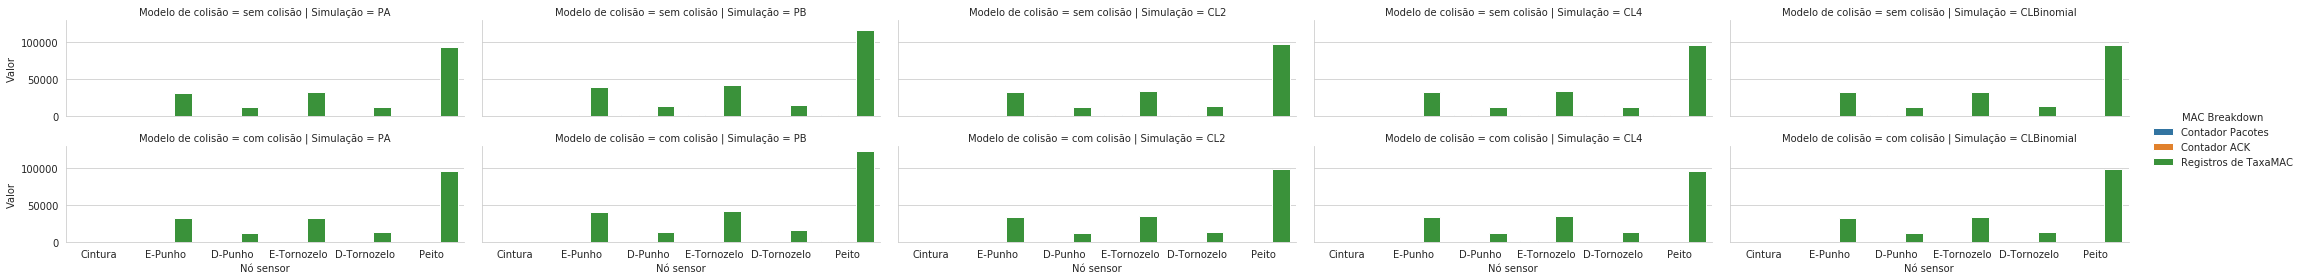

In [22]:
df = melted_data[melted_data["Taxa de dados"] == "média"]

opt_chart.update({"data" : df})

sns.catplot(**opt_chart)

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Taxa de dados           180 non-null object
Modelo de colisão       180 non-null object
Nó sensor               180 non-null object
Contador ACK            180 non-null float64
Contador Pacotes        180 non-null float64
Registros de TaxaMAC    180 non-null float64
Total de ACKs           180 non-null float64
Total de pacotes        180 non-null float64
Simulação               180 non-null object
dtypes: float64(5), object(4)
memory usage: 12.7+ KB


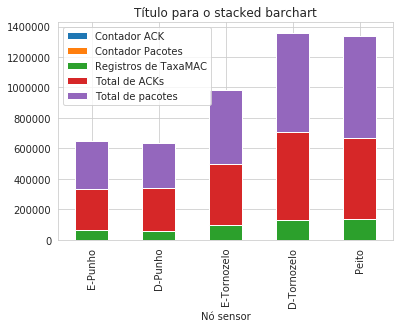

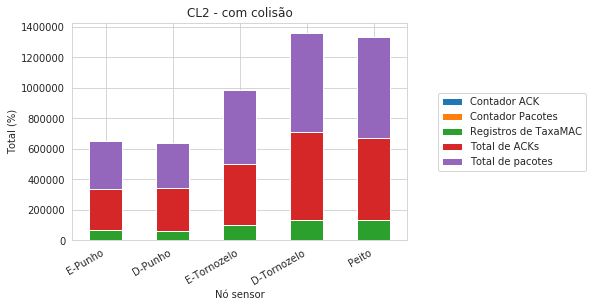

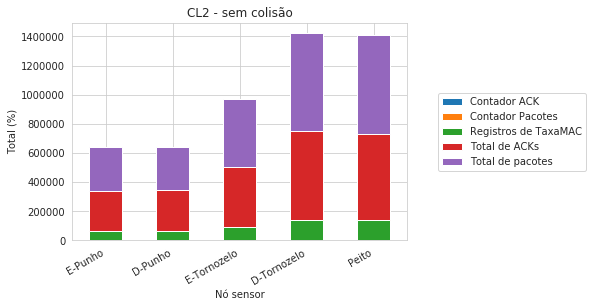

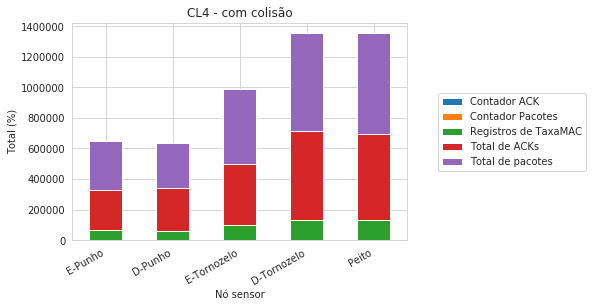

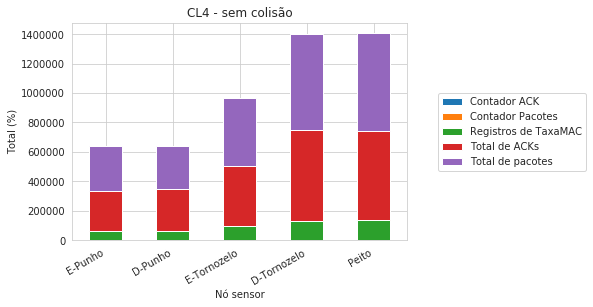

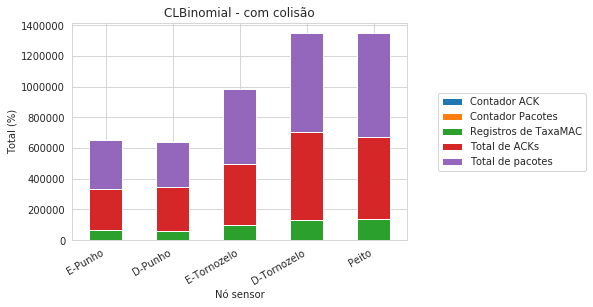

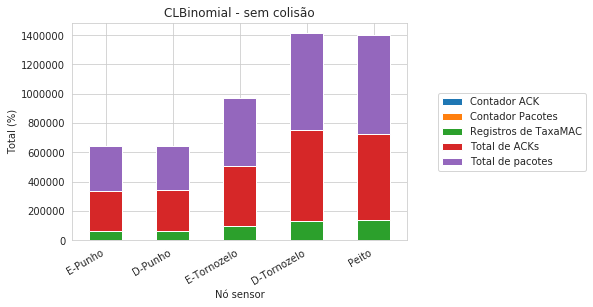

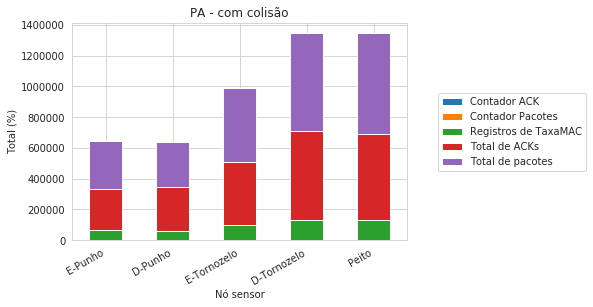

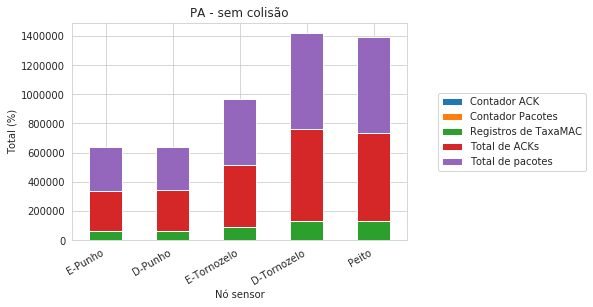

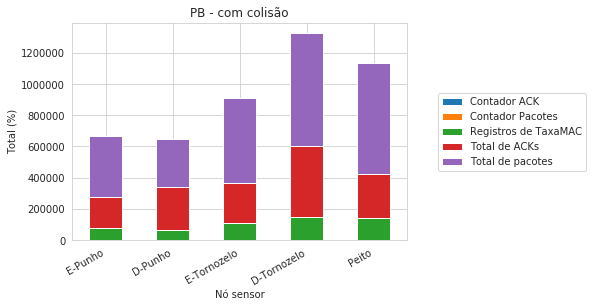

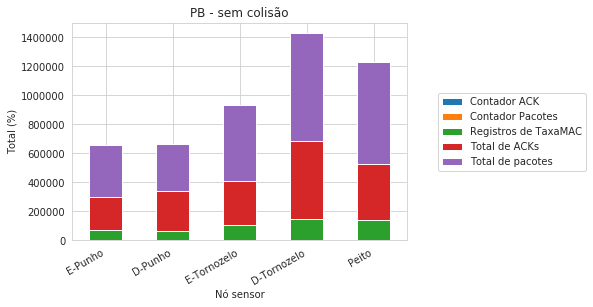

In [24]:
select = (df_data['Taxa de dados'] == 'alta') & (df_data['Nó sensor'] != 'Cintura')
df = df_data[select]

df = df.groupby(by=['Simulação','Modelo de colisão'])
axes = df.plot.bar(x='Nó sensor',stacked=True,title='Título para o stacked barchart')

for t, ax in zip(df.groups.keys(),axes) :
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Total (%)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')

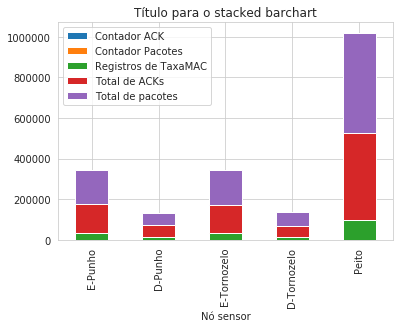

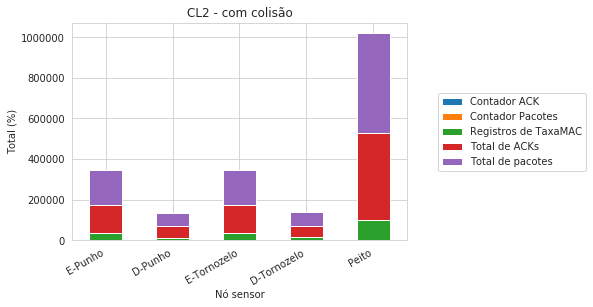

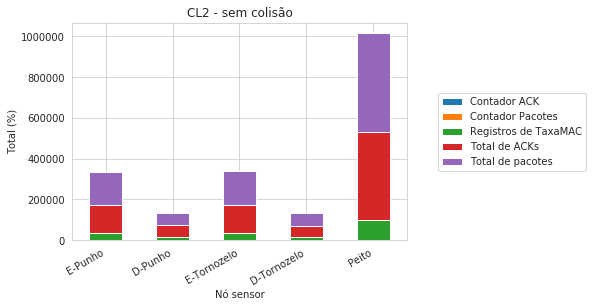

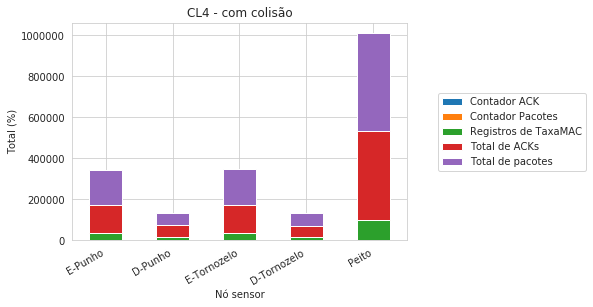

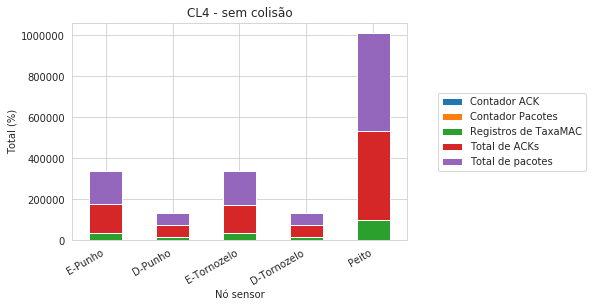

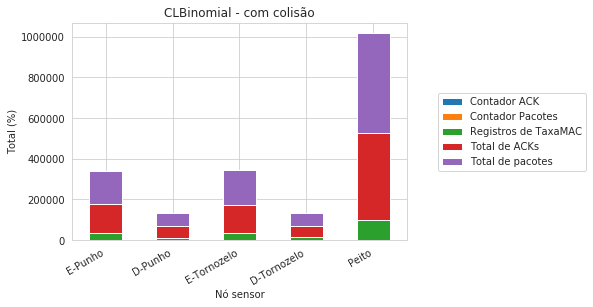

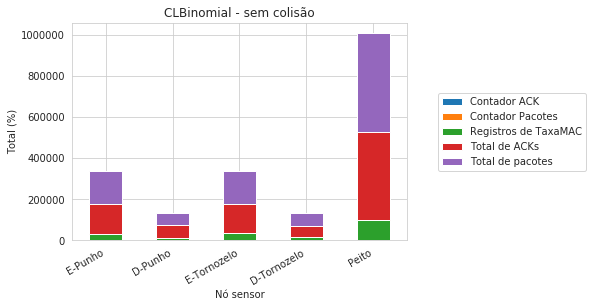

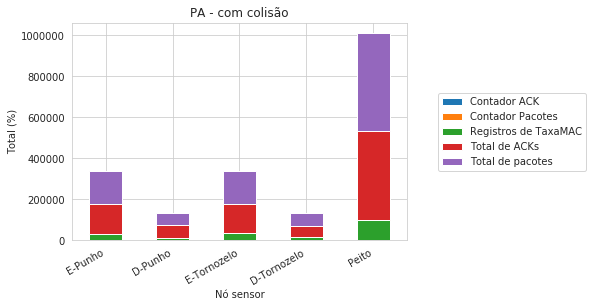

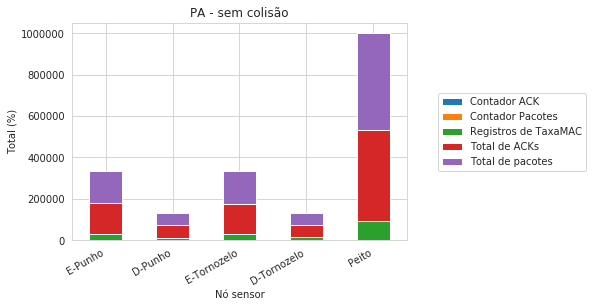

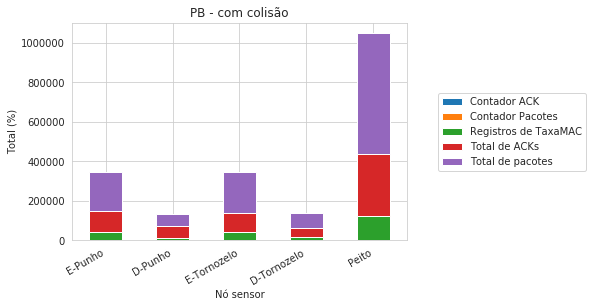

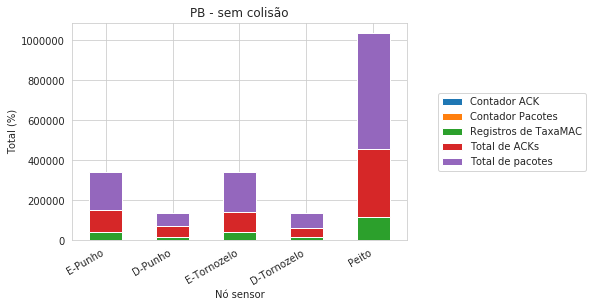

In [25]:
select = (df_data['Taxa de dados'] == 'média') & (df_data['Nó sensor'] != 'Cintura')
df = df_data[select]

df = df.groupby(by=['Simulação','Modelo de colisão'])
axes = df.plot.bar(x='Nó sensor',stacked=True,title='Título para o stacked barchart')

for t, ax in zip(df.groups.keys(),axes) :
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Total (%)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')

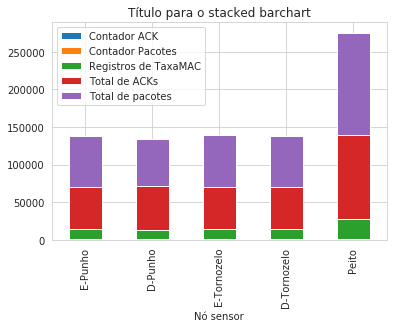

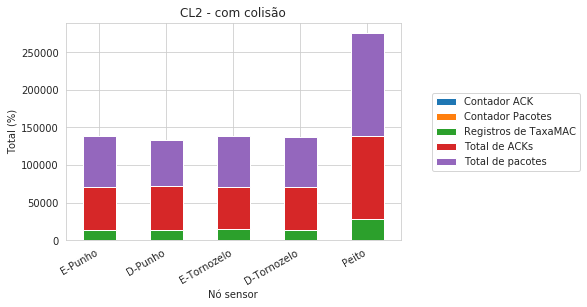

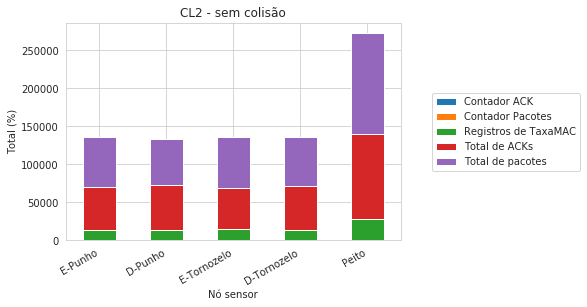

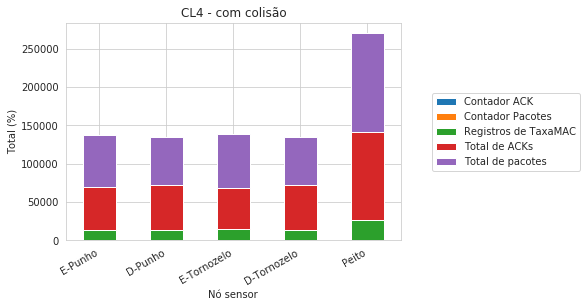

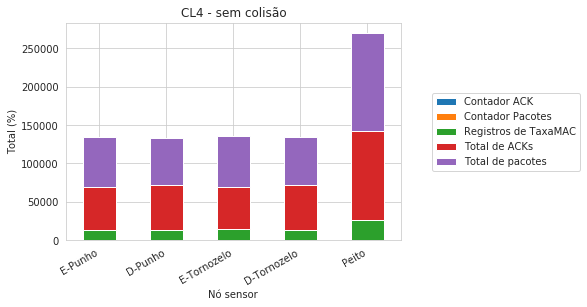

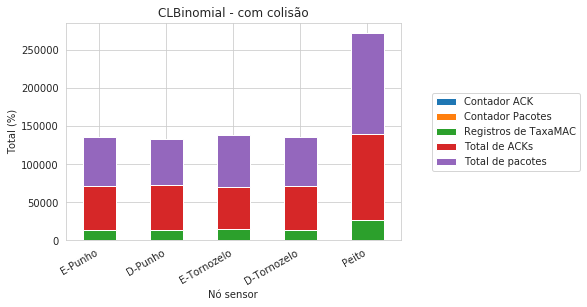

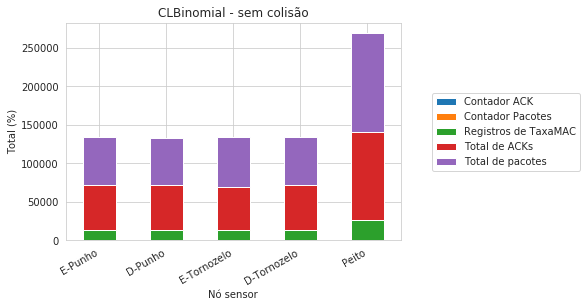

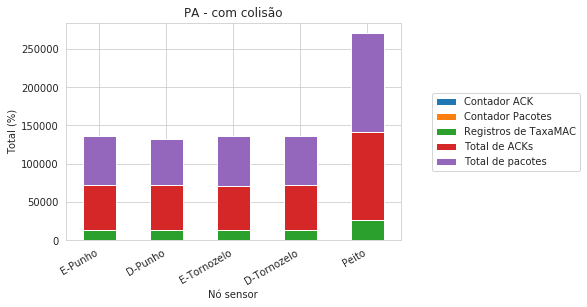

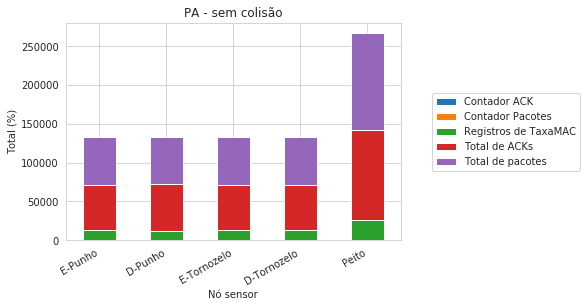

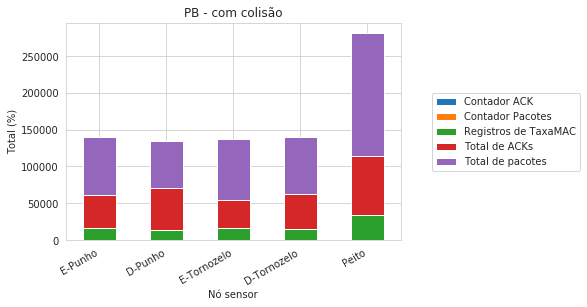

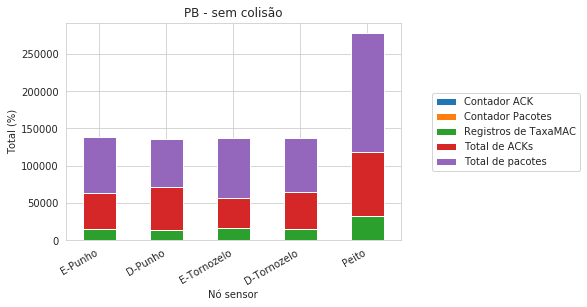

In [26]:
select = (df_data['Taxa de dados'] == 'baixa') & (df_data['Nó sensor'] != 'Cintura')
df = df_data[select]

df = df.groupby(by=['Simulação','Modelo de colisão'])
axes = df.plot.bar(x='Nó sensor',stacked=True,title='Título para o stacked barchart')

for t, ax in zip(df.groups.keys(),axes) :
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Total (%)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')